# Sampling of strong times

## I. The strong stationary time T

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from strong_stationary_times import core, sampling

def sample(sampler, list_M, n):
    results = []
    #
    for M in list_M:
        A = np.zeros( shape=(M,M), dtype=int )
        # Initialization with one element per fiber
        # for i in range(M):
        #    A[i,i] = 1
        # Initialization with only one element in only one fiber
        A[1,1] = 1
        samples = np.array( [sampler(A, debug=False) for i in range(1,n)] )
        print("M: ", M)
        # print("Array of iid stopping times: ")
        # print(samples)
        mean = np.mean(samples)
        std  = np.std(samples)
        result = {
            "M"   : M,
            "n"   : n,
            "mean": mean,
            "std" : std
        }
        results.append(result)
        print("Result: ", result)
        plt.hist(Ts/(M*M), bins=15)
        plt.show()
    return results

M:  5
Result:  {'M': 5, 'n': 100, 'mean': 35.81818181818182, 'std': 19.625464614644912}


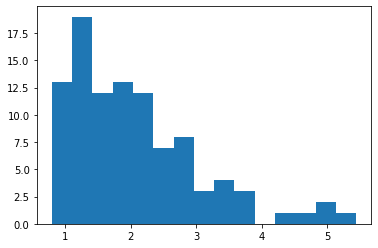

M:  7
Result:  {'M': 7, 'n': 100, 'mean': 52.39393939393939, 'std': 32.86360492894259}


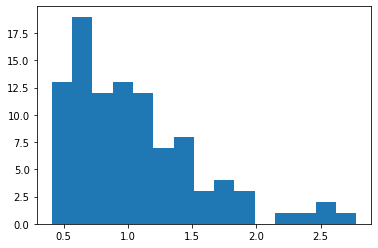

M:  9
Result:  {'M': 9, 'n': 100, 'mean': 77.18181818181819, 'std': 38.94605531985291}


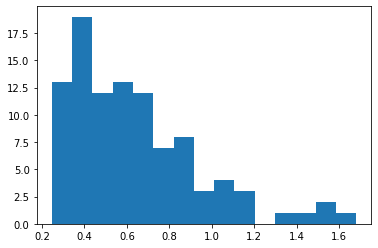

M:  11
Result:  {'M': 11, 'n': 100, 'mean': 114.33333333333333, 'std': 68.33192903213347}


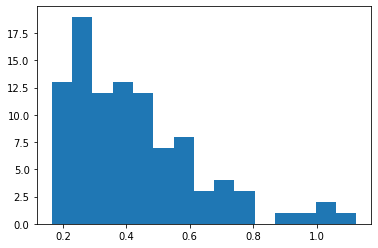

M:  13
Result:  {'M': 13, 'n': 100, 'mean': 182.9090909090909, 'std': 121.44426255387432}


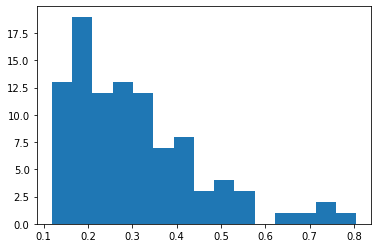

M:  15
Result:  {'M': 15, 'n': 100, 'mean': 234.86868686868686, 'std': 137.32448091979757}


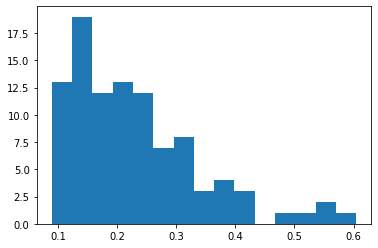

M:  17
Result:  {'M': 17, 'n': 100, 'mean': 303.82828282828285, 'std': 225.03432018402813}


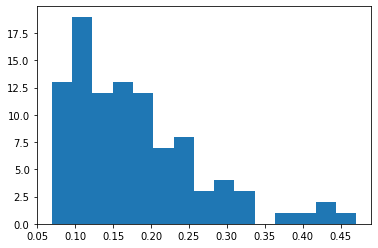

In [35]:
n      = 100            # number of iid samples
list_M = [5, 7, 9, 11, 13, 15, 17]
#list_M = [5, 7]
results = sample( sampler=sampling.sample_T, list_M=list_M, n=n)

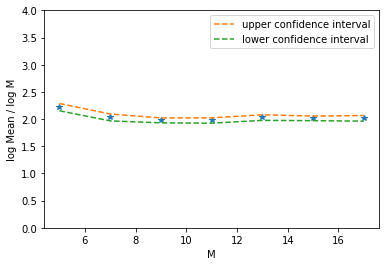

In [38]:
# Plot 
means = np.array( [res['mean'] for res in results])
stds  = np.array( [res['std'] for res in results] )
ic1   = means + 1.96*stds/np.sqrt(n)
ic2   = means - 1.96*stds/np.sqrt(n)
plt.plot(list_M, np.log(means)/np.log(list_M), '*')
plt.plot(list_M, np.log(ic1)/np.log(list_M), '--', label="upper confidence interval")
plt.plot(list_M, np.log(ic2)/np.log(list_M), '--', label="lower confidence interval")
plt.legend()
plt.xlabel("M")
plt.ylabel("log Mean / log M")
plt.ylim(0, 4)
plt.savefig("T_log_mean_vs_M.png")

# II. The stopping time S

M:  5
Result:  {'M': 5, 'n': 100, 'mean': 23.494949494949495, 'std': 12.88125545780249}


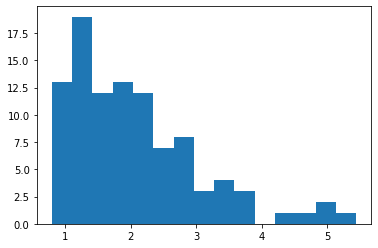

M:  7
Result:  {'M': 7, 'n': 100, 'mean': 37.22222222222222, 'std': 16.814228916356154}


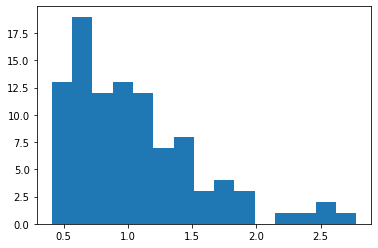

M:  9
Result:  {'M': 9, 'n': 100, 'mean': 45.44444444444444, 'std': 19.10165375580108}


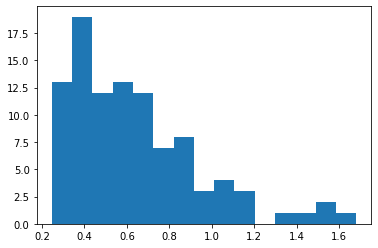

M:  11
Result:  {'M': 11, 'n': 100, 'mean': 59.2020202020202, 'std': 23.483060646621965}


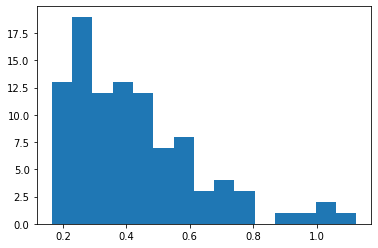

M:  13
Result:  {'M': 13, 'n': 100, 'mean': 64.17171717171718, 'std': 28.353483175130926}


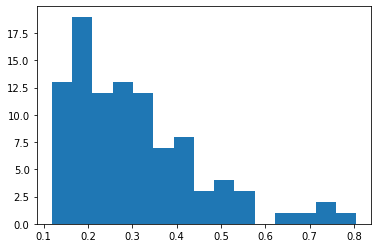

M:  15
Result:  {'M': 15, 'n': 100, 'mean': 72.55555555555556, 'std': 30.38713916629139}


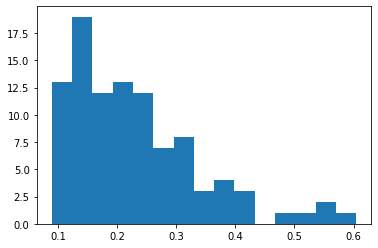

M:  17
Result:  {'M': 17, 'n': 100, 'mean': 80.5959595959596, 'std': 37.69412225217618}


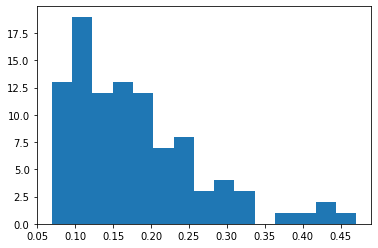

In [39]:
n      = 100            # number of iid samples
list_M = [5, 7, 9, 11, 13, 15, 17]
#list_M = [5, 7]
results = sample( sampler=sampling.sample_S, list_M=list_M, n=n)

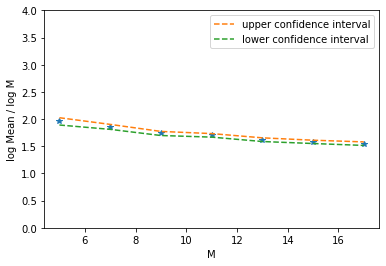

In [40]:
# Plot 
means = np.array( [res['mean'] for res in results])
stds  = np.array( [res['std'] for res in results] )
ic1   = means + 1.96*stds/np.sqrt(n)
ic2   = means - 1.96*stds/np.sqrt(n)
plt.plot(list_M, np.log(means)/np.log(list_M), '*')
plt.plot(list_M, np.log(ic1)/np.log(list_M), '--', label="upper confidence interval")
plt.plot(list_M, np.log(ic2)/np.log(list_M), '--', label="lower confidence interval")
plt.legend()
plt.xlabel("M")
plt.ylabel("log Mean / log M")
plt.ylim(0, 4)
plt.savefig("S_log_mean_vs_M.png")